In [1]:
# 2024-11-12

3주 뒤 프로젝트 발표 / 일주일 뒤 레포트? / 2022-10-08 Chl-a

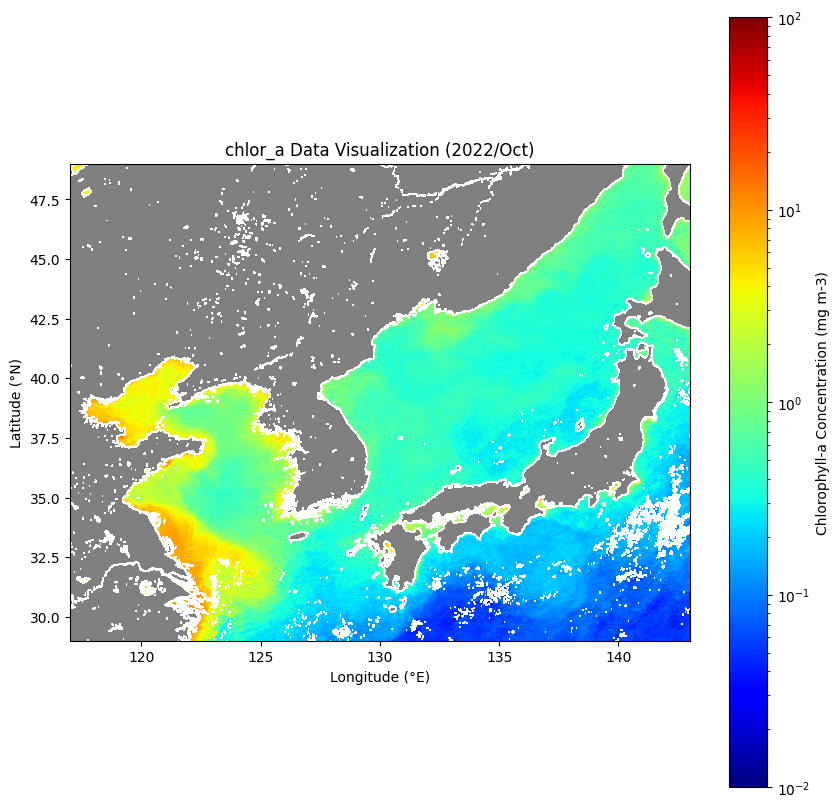

In [13]:
# Load module
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, num2date

# Input file and data visualization settings
file = 'F:\BigDataProcessing\GS202210_CHL_NW_month.nc'
varname = 'chlor_a'
font_size = 20 
cmin, cmax = 0.01, 100 

# Use log norm for chlorophyll-a data
norm = colors.LogNorm(vmin=cmin, vmax=cmax)     # (로그 정규화) 객체 설정

# Read the Dataset and Geo-ref data
with Dataset(file, 'r') as nc:
    sds = nc[varname][:]    # the ouput is a numpy masked array
    sds = np.ma.squeeze(sds)     # Remove singleton dimensions
    lat = nc['lat'][:]
    lon = nc['lon'][:]
    time = num2date(nc['time'][:], units=nc['time'].units, calendar=nc['time'].calendar)
    label = nc[varname].long_name.split(',')[0] + ' [label]' 

# Visualization without basemap
plt.figure(figsize=(10, 10))
extent = [lon.min(), lon.max(), lat.min(), lat.max()]

# Land mask
mask = np.where(~sds.mask, np.nan, 0)

# Plotting the land mask
plt.imshow(mask, cmap='gray', vmin=-1, vmax=1, extent=extent)

# Plot the chlorophyll-a data
plt.imshow(sds, extent=extent, norm=norm, cmap='jet')

# Colorbar
plt.colorbar(label='Chlorophyll-a Concentration (mg m-3)')

# Add title and labels
plt.title(f'{varname} Data Visualization (2022/Oct)')
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')

plt.show()

TEST-7

    냉수대 2023년 7월 하순 10일간 유지 (2일만에 소멸)

    SST 18도 이하를 냉수대 출현으로 정의

    봄-여름 사이, 특히 5월~8월 사이 / 표층 해수 온도(SST) 분석

    5/6/7월 월 데이터 그려보고 나오지 않는다면 > 7월 일 데이터로 확인해보기